# ANALISIS DATA PEMBOKINGAN HOTEL
![title](FIND_IT_2020.png)
### source : FIND IT 2020 DATA ANALYST

#### oleh :
    Elvin Nur Furqon (Telkom University)
    Sebastian Cahyo Ardhi Iswara (Telkom University)

## LIBRARY

Module library yang akan digunakan Modul yang digunakan sebagai berikut :
- Pandas
- matplotlib
- Seaborn
- Numpy
- sklearn (scikit-learn)

In [1]:
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report as report

## LOAD DATA FILE

load file 'hotel_bookings.csv' kedalam notebook

In [2]:
df = pd.read_csv('hotel_bookings.csv',parse_dates=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# EDA (Exploratory Data Analysis)
explorasi informasi-informasi atau kesimpualan yang terkait dengan data ini.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

jadi pada data tersebut diperoleh informasi sebagai berikut.
* total data 119.389 dengan total 31 column
* memory yang digunakan kurang lebih 29.1 MB
* data yang kosong berapa pada column children, country dan company

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Perlu cleaning data untuk dapat summary yang tepat

###  1. Cleaning Data

membenahi data-data yang dapat menggangu pada pengambilan kesimpulan

In [5]:
#df.hotel.astype('category')
# df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
# df = df.set_index(['reservation_status_date']).sort_index()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
for column in df.columns:
    print(f'total unique value dari column "{column}"')
    print(df[column].value_counts())
    print()

total unique value dari column "hotel"
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

total unique value dari column "is_canceled"
0    75166
1    44224
Name: is_canceled, dtype: int64

total unique value dari column "lead_time"
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
458       1
371       1
737       1
435       1
387       1
Name: lead_time, Length: 479, dtype: int64

total unique value dari column "arrival_date_year"
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

total unique value dari column "arrival_date_month"
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

total unique value dari column "arrival_date_week_number"
33    3580
30    3087
32    3045
34    3040
18    2926
21    

In [7]:
df.isna().sum()/len(df)

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [8]:
df = df.drop(['agent','company'],axis=1)
df = df.ffill()

In [9]:
df.isna().sum()/len(df)

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [10]:
df_new = df
df_new['hotel'] = df_new['hotel'].astype('category')
df_new['arrival_date_month'] = df_new['arrival_date_month'].astype('category') 
df_new['meal'] = df_new['meal'].astype('category')
df_new['market_segment'] = df_new['market_segment'].astype('category')
df_new['distribution_channel'] = df_new['distribution_channel'].astype('category')
df_new['reserved_room_type'] = df_new['reserved_room_type'].astype('category')
df_new['assigned_room_type'] = df_new['assigned_room_type'].astype('category')
df_new['deposit_type'] = df_new['deposit_type'].astype('category')
df_new['customer_type'] = df_new['customer_type'].astype('category')
df_new['reservation_status'] = df_new['reservation_status'].astype('category')
df_new['is_canceled'] = df_new['is_canceled'].astype('category')
df_new['country'] = df_new['country'].astype('category')

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  category
 1   is_canceled                     119390 non-null  category
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  category
 5   arrival_date_week_number        119390 non-null  int64   
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_week_nights            119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119390 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

### 2. Visualisasi Data

representasi data-data untuk membantu dalam mendapatkan kesimplan yang tepat

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64


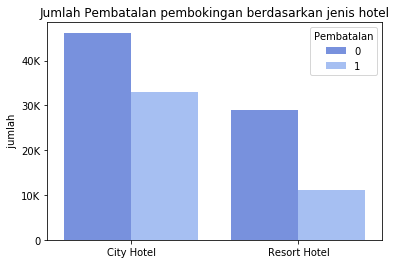

In [12]:
print(df.groupby('hotel')['is_canceled'].value_counts())
sns.set_palette('coolwarm')
plot = sns.countplot(x='hotel',data=df,hue='is_canceled')
plt.title('Jumlah Pembatalan pembokingan berdasarkan jenis hotel')
plt.yticks([0,10_000,20_000,30_000,40_000],[0,'10K','20K','30K','40K'])
plt.legend(title='Pembatalan')
plt.xlabel('')
plt.ylabel(' jumlah')
plt.show()

Dari grafik diatas, kita mengetahui bahwa Pesanan pada city hotel banyak yang dibatalkan ketimbang resort hotel

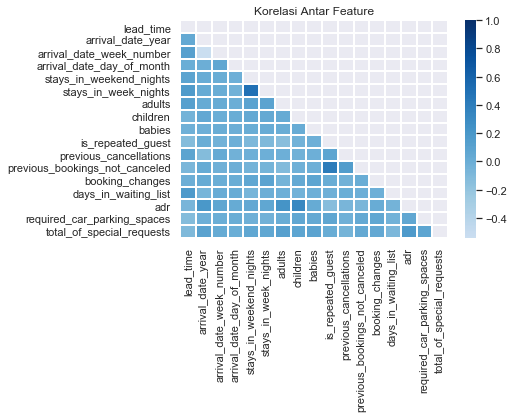

In [13]:
sns.set()
corr = df_new.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,center=0,linewidth=1,cmap='Blues')
plt.title('Korelasi Antar Feature')
plt.show()

berdasarkan hasil analisis data diatas, kami mencari korelasi antara feature yang ada guna mereduksi banyak feature yang akan digunakan dalam proses pembuatan model:

feature stay_in_week_nights dan stay_in_weekend_nights memiliki korelasi yang cukup tinggi, sehingga apabila kita membuang salah satunya informasi yang didapatkan tetap utuh

feature previous_booking_not_canceled dan is_repeated_guest juga memiliki korelasi yang cukup tinggi kedua setelah feature stay_in_week_nights.

Berdasarkan data-data yang diperoleh, maka kami menarik kesimpulan sebagai berikut:
* feature stay_in_week_nights akan di drop dikarenakan dapat digantikan dengan stay_in_weekend_nights, alasannya karena dalam reservasi pembokingan hotel, dalam kenyataanya adalah saat liburan(weekend) akan sangat berpengaruh dibandingkan dengan pembokingan biasa pada hari libur (sabtu/minggu)
* feature previous_booking_not_canceled akan di drop dikarenakan, jika is_repeated_guest / tamu yang sudah pernah menginap, kemungkinan besar tidak membatalkan sebelumnya.

In [14]:
df_new = df_new.drop(['stays_in_week_nights','previous_bookings_not_canceled'],axis=1)

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   hotel                        119390 non-null  category
 1   is_canceled                  119390 non-null  category
 2   lead_time                    119390 non-null  int64   
 3   arrival_date_year            119390 non-null  int64   
 4   arrival_date_month           119390 non-null  category
 5   arrival_date_week_number     119390 non-null  int64   
 6   arrival_date_day_of_month    119390 non-null  int64   
 7   stays_in_weekend_nights      119390 non-null  int64   
 8   adults                       119390 non-null  int64   
 9   children                     119390 non-null  float64 
 10  babies                       119390 non-null  int64   
 11  meal                         119390 non-null  category
 12  country                      119390 non-null

In [16]:
df_new.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [17]:
X,y = df_new.drop(['is_canceled','reservation_status_date'],axis=1) , df_new['is_canceled']

# TRAIN MODEL

In [18]:
encoder = LabelEncoder()
X['hotel'] = encoder.fit_transform(df['hotel'])
X['arrival_date_month'] = encoder.fit_transform(df['hotel'])
X['meal'] = encoder.fit_transform(df['meal'])
X['market_segment'] = encoder.fit_transform(df['market_segment'])
X['distribution_channel'] = encoder.fit_transform(df['distribution_channel'])
X['reserved_room_type'] = encoder.fit_transform(df['reserved_room_type'])
X['assigned_room_type'] = encoder.fit_transform(df['assigned_room_type'])
X['deposit_type'] = encoder.fit_transform(df['deposit_type'])
X['customer_type'] = encoder.fit_transform(df['customer_type'])
X['reservation_status'] = encoder.fit_transform(df['reservation_status'])
X['country'] = encoder.fit_transform(df['country'])

In [19]:
X.shape

(119390, 26)

In [20]:
rfe = RFE(RandomForestClassifier(),10,step=1,verbose=0)
%timeit rfe.fit(X,y)
mask = rfe.support_
X_new = X.loc[:,mask]
print(X_new.columns)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,stratify=y,test_size=0.25,random_state=46)

In [ ]:
rf = RandomForestClassifier(n_jobs=-1,max_features=10)
%timeit rf.fit(X_train,y_train)
rf.score(X_test,y_test)
acc = rf.score(X_test,y_test)

print(f'Akurasi model prediksi pembatalan booking hotel sebesar\t:  {acc*100}%')

In [ ]:

cv = cross_val_score(rf,X_train,y_train,cv=10)

In [ ]:
cv.mean()

In [ ]:

print(report(y_test,rf.predict(X_test)))

In [ ]:
df.head()

In [ ]:
X_new.head()

In [ ]:
df.head()

In [ ]:
predict = rf.predict(X_new)

final = pd.DataFrame()
final['hotel'] = df_new['hotel']
final['is_canceled'] = df_new['is_canceled']
final['predict_is_canceled'] = predict
final.head(20)

In [ ]:
final.to_excel('analyst.xlsx')